In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import DSMC_Ar_benchmark

In [2]:
import cProfile

In [3]:
import torch

In [18]:
N = int(1e5)
u = np.ones(N)*400
v = np.zeros(N)
w = np.zeros(N)

velosity_matrix = np.array([u, w, v]).T

print(velosity_matrix.shape)

(100000, 3)


(100000, 3)


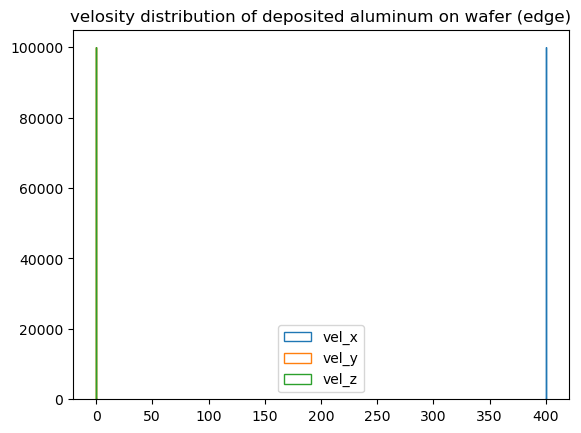

In [28]:
print(velosity_matrix.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [20]:
posX = np.random.rand(N)*0.05 - 0.025
posY = np.random.rand(N)*0.05 - 0.025
posZ = np.random.rand(N)*0.05 - 0.025

release_pos = np.array([posX, posY, posZ]).T

print(release_pos.shape)

(100000, 3)


(100000, 3)


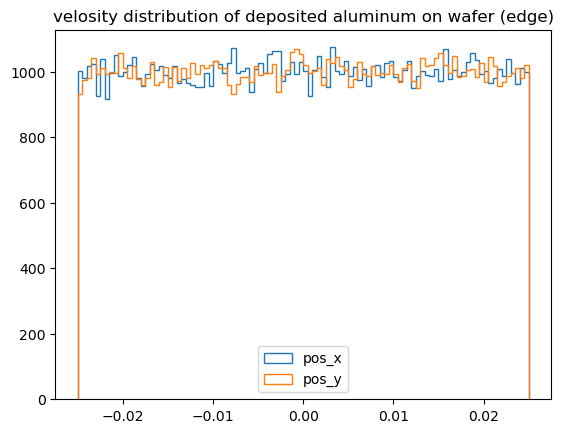

In [27]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [7]:
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

In [26]:
logname = 'DSMC_0709_TS180_collision_ArAr_benchmark'
transport = DSMC_Ar_benchmark.transport(mirror=True, maxMove=1, pressure_pa=0.5, timeStep= 1e-7, temperature=300, cellSize=[50, 50, 50], celllength=0.002, chamberSize=[0.05, 0.05, 0.05], DXsec=DXsec_Al, logname=logname)
transport.setXsec(energy_range=[0.1, 50, 50])

array([0.00000000e+00, 2.88759926e-19, 2.50345501e-19, 2.29729804e-19,
       2.15988267e-19, 2.05836085e-19, 1.97865444e-19, 1.91350115e-19,
       1.85869120e-19, 1.81157876e-19, 1.77039879e-19, 1.73391861e-19,
       1.70124541e-19, 1.67171304e-19, 1.64481213e-19, 1.62014501e-19,
       1.59739561e-19, 1.57630888e-19, 1.55667619e-19, 1.53832483e-19,
       1.52111037e-19, 1.50491083e-19, 1.48962236e-19, 1.47515583e-19,
       1.46143422e-19, 1.44839058e-19, 1.43596631e-19, 1.42410991e-19,
       1.41277587e-19, 1.40192376e-19, 1.39151756e-19, 1.38152501e-19,
       1.37191715e-19, 1.36266785e-19, 1.35375349e-19, 1.34515263e-19,
       1.33684578e-19, 1.32881516e-19, 1.32104448e-19, 1.31351884e-19,
       1.30622454e-19, 1.29914895e-19, 1.29228042e-19, 1.28560820e-19,
       1.27912230e-19, 1.27281348e-19, 1.26667313e-19, 1.26069323e-19,
       1.25486633e-19, 1.24918544e-19])

In [44]:
result = transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-4)

running: 100%|██████████████████████████████████████████████████████| 100/100 [00:18<00:00, 5.41B/s]


In [15]:
print(result[1].shape)

(1000000, 6)


(100000, 6)


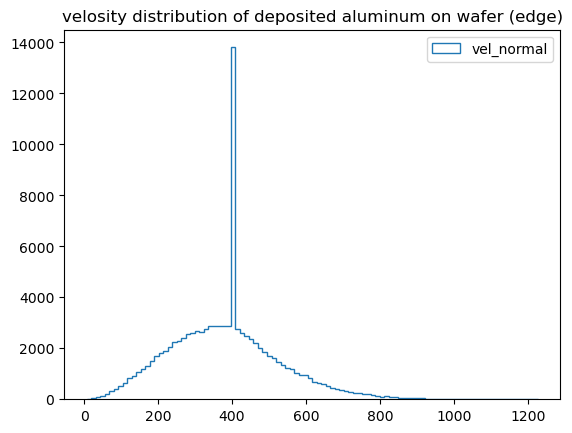

In [42]:
print(result[1].shape)

velMag = np.linalg.norm(result[1][:, 3:], axis=1)
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velMag, bins=100,histtype='step', stacked=True, fill=False, label='vel_normal')

# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(100000, 6)


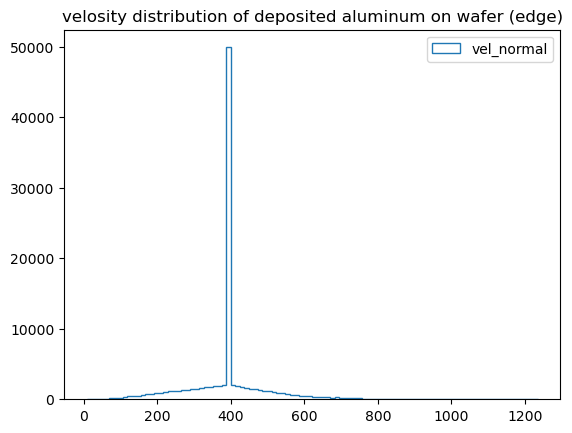

In [45]:
print(result[1].shape)

velMag = np.linalg.norm(result[1][:, 3:], axis=1)
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velMag, bins=100,histtype='step', stacked=True, fill=False, label='vel_normal')

# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(100000, 6)


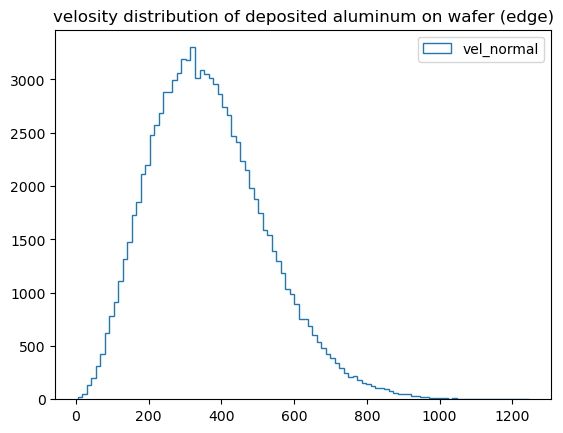

In [30]:
print(result[1].shape)

velMag = np.linalg.norm(result[1][:, 3:], axis=1)
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velMag, bins=100,histtype='step', stacked=True, fill=False, label='vel_normal')

# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [46]:
np.save('DSMC_benchmark_5e-1Pa_1e-4s', result[1])

In [47]:
vel_t1e_4 = np.load('./DSMC_benchmark_5e-1Pa_1e-4s.npy')
vel_t2e_4 = np.load('./DSMC_benchmark_5e-1Pa_2e-4s.npy')
vel_t3e_4 = np.load('./DSMC_benchmark_5e-1Pa_3e-4s.npy')
vel_t5e_4 = np.load('./DSMC_benchmark_5e-1Pa_5e-4s.npy')
vel_t5e_3 = np.load('./DSMC_benchmark_5e-1Pa_5e-3s.npy')

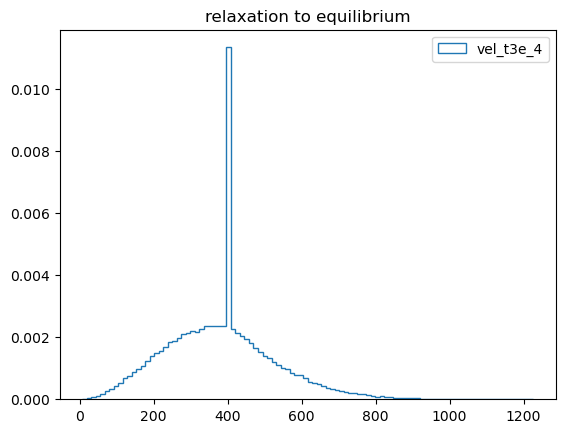

In [72]:
fig, ax = plt.subplots()
ax.set_title("relaxation to equilibrium")
# ax.hist(np.linalg.norm(vel_t1e_4 [:, 3:], axis=1), bins=100,histtype='step', stacked=True, fill=False, density=True, label='vel_t1e_4')
# ax.hist(np.linalg.norm(vel_t2e_4 [:, 3:], axis=1), bins=100,histtype='step', stacked=True, fill=False, density=True,label='vel_t2e_4')
ax.hist(np.linalg.norm(vel_t3e_4 [:, 3:], axis=1), bins=100,histtype='step', stacked=True, fill=False, density=True,label='vel_t3e_4')
# ax.hist(np.linalg.norm(vel_t5e_4 [:, 3:], axis=1), bins=100,histtype='step', stacked=True, fill=False, density=True,label='vel_t5e_4')
# ax.hist(np.linalg.norm(vel_t5e_3 [:, 3:], axis=1), bins=100,histtype='step', stacked=True, fill=False, density=True,label='vel_t5e_3')
# ax.set_ylim(0, 0.003)
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()